In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
# To make sure we are using gpu not cpu
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten , Dropout , BatchNormalization, MaxPooling2D, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import Callback, ModelCheckpoint, CSVLogger

import tensorflow as tf

import pickle

from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:

train = datagen.flow_from_directory('/content/gdrive/My Drive/train/', target_size=(224, 224), class_mode='binary', batch_size=64)
# load and iterate validation dataset
val = datagen.flow_from_directory('/content/gdrive/My Drive/val/', target_size=(224, 224), class_mode='binary', batch_size=64)
# load and iterate test dataset
test = datagen.flow_from_directory('/content/gdrive/My Drive/test/', target_size=(224, 224), class_mode='binary', batch_size=64)

Found 3816 images belonging to 2 classes.
Found 1908 images belonging to 2 classes.
Found 1928 images belonging to 2 classes.


In [ ]:
imgs, labels = next(train)

In [ ]:
imgs.shape

(64, 224, 224, 3)

In [ ]:
train.class_indices


{'Benign': 0, 'Malignant': 1}

1.0


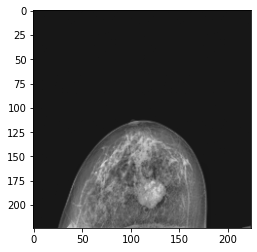

In [ ]:
plt.imshow(imgs[0])
print(labels[0])

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224,224,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
#https://blog.paperspace.com/intro-to-optimization-momentum-rmsprop-adam/

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 26, 26, 64)      

In [ ]:
STEP_SIZE_TRAIN = train.n//train.batch_size
STEP_SIZE_VAL = val.n//val.batch_size

In [ ]:
csv_logger = CSVLogger('/content/gdrive/My Drive/training.log', separator=',', append=False)

In [ ]:
history = model.fit_generator(generator = train, 
                    steps_per_epoch=STEP_SIZE_TRAIN, 
                    validation_data=test,
                    validation_steps=STEP_SIZE_VAL,
                    epochs=25,
                    callbacks=[csv_logger]) 
model.save('/content/gdrive/My Drive/first_model.h5')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/25
59/59 [==============================] - 23s 327ms/step - loss: 0.7181 - accuracy: 0.6546 - val_loss: 0.6457 - val_accuracy: 0.6665
Epoch 2/25
59/59 [==============================] - 19s 313ms/step - loss: 0.6438 - accuracy: 0.6679 - val_loss: 0.6310 - val_accuracy: 0.6692
Epoch 3/25
59/59 [==============================] - 18s 310ms/step - loss: 0.6225 - accuracy: 0.6698 - val_loss: 0.6145 - val_accuracy: 0.6719
Epoch 4/25
59/59 [==============================] - 19s 328ms/step - loss: 0.5810 - accuracy: 0.6842 - val_loss: 0.6099 - val_accuracy: 0.6816
Epoch 5/25
59/59 [==============================] - 19s 313ms/step - loss: 0.5458 - accuracy: 0.7111 - val_loss: 0.5684 - val_accuracy: 0.7010
Epoch 6/25
59/59 [==============================] - 19s 317ms/step - loss: 0.4905 - accuracy: 0.7479 - val_loss: 0.5528 - val_accuracy: 0.7311
Epoch 7/25
59/59 [==============================] - 20s 337ms/step - loss: 0.4363 - accuracy: 0.7873 - val_loss: 0.5126 - val_accuracy: 0.7532

In [ ]:
import pandas as pd
log_data = pd.read_csv('/content/gdrive/My Drive/training.log', sep=',', engine='python')

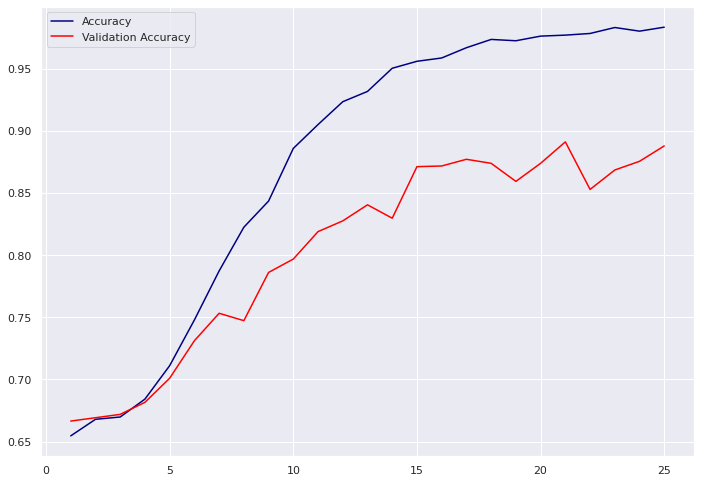

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

plt.plot(np.arange(1, len(history.history['accuracy'])+1,1), history.history['accuracy'], color='navy', label = 'Accuracy')
plt.plot(np.arange(1, len(history.history['accuracy'])+1,1), history.history['val_accuracy'], color='red', label='Validation Accuracy')
plt.legend()

In [ ]:
# show the accuracy graph from the saved history (log_data)
sns.set(rc={'figure.figsize':(11.7,8.27)})

plt.plot(np.arange(1, len(log_data['accuracy'])+1,1), log_data['accuracy'], color='navy', label = 'Accuracy')
plt.plot(np.arange(1, len(log_data['accuracy'])+1,1), log_data['val_accuracy'], color='red', label='Validation Accuracy')
plt.legend()

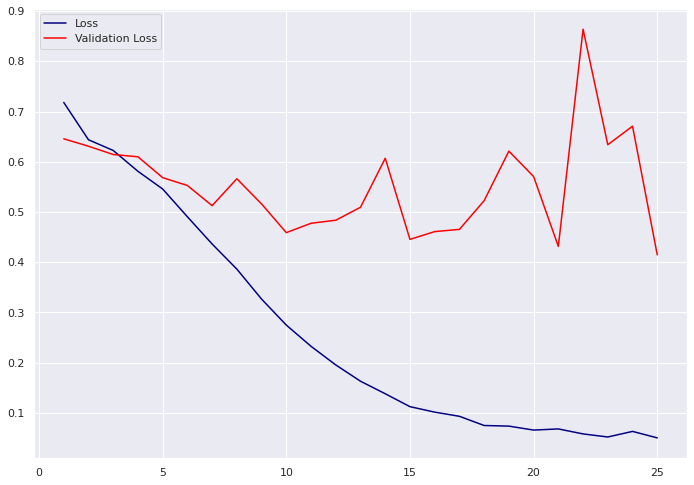

In [ ]:
plt.plot(np.arange(1, len(history.history['loss'])+1,1), history.history['loss'], color='navy', label = 'Loss')
plt.plot(np.arange(1, len(history.history['loss'])+1,1), history.history['val_loss'], color='red', label='Validation Loss')
plt.legend()

In [ ]:
# show the loss graph from the saved history (log_data)

plt.plot(np.arange(1, len(log_data['loss'])+1,1), log_data['loss'], color='navy', label = 'Loss')
plt.plot(np.arange(1, len(log_data['loss'])+1,1), log_data['val_loss'], color='red', label='Validation Loss')
plt.legend()

In [ ]:
from keras.models import load_model

restored_model = load_model('/content/gdrive/My Drive/first_model.h5')

In [ ]:
steps = test.n//test.batch_size

test.reset()
X_test, y_test = [] , []
for i in range(steps):
    a , b = test.next()
    X_test.extend(a) 
    y_test.extend(b)

In [ ]:
X_test, y_test = np.array(X_test), np.array(y_test)

In [ ]:
pickle.dump(X_test, open('/content/gdrive/My Drive/X_test.pkl', 'wb'))
pickle.dump(y_test, open('/content/gdrive/My Drive/y_test.pkl', 'wb'))

In [ ]:
X_test = pickle.load(open('/content/gdrive/My Drive/X_test.pkl', 'rb'))
y_test = pickle.load(open('/content/gdrive/My Drive/y_test.pkl', 'rb'))

In [ ]:
print(X_test.shape, y_test.shape)

(1920, 224, 224, 3) (1920,)


In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.41484925150871277 / Test accuracy: 0.8885416388511658


In [ ]:
# Using the saved model
score = restored_model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

In [ ]:
y_pred_prob = model.predict(X_test)

In [ ]:
# Using the saved model
y_pred_prob = restored_model.predict(X_test)

In [ ]:
y_pred_prob

array([[6.3605723e-05],
       [7.8963405e-01],
       [9.9998617e-01],
       ...,
       [2.8432084e-03],
       [7.2051102e-01],
       [2.9555806e-06]], dtype=float32)

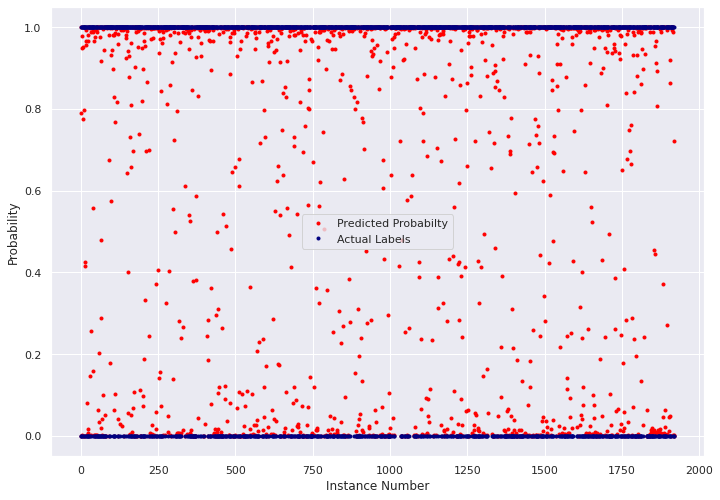

In [ ]:
plt.plot(y_pred_prob,'.',color='red',label='Predicted Probabilty')
plt.plot(y_test,'.',color='navy',label='Actual Labels')
plt.xlabel('Instance Number')
plt.ylabel('Probability')
plt.legend()

In [ ]:
y_test

array([0., 0., 1., ..., 0., 1., 0.], dtype=float32)

In [ ]:
threshold = 0.5
y_pred = np.where(y_pred_prob > threshold, 1,0)
y_pred.squeeze()

array([0, 1, 1, ..., 1, 1, 1])

Text(0.5, 1.0, 'Confusion Metrix for Breast Cancer')

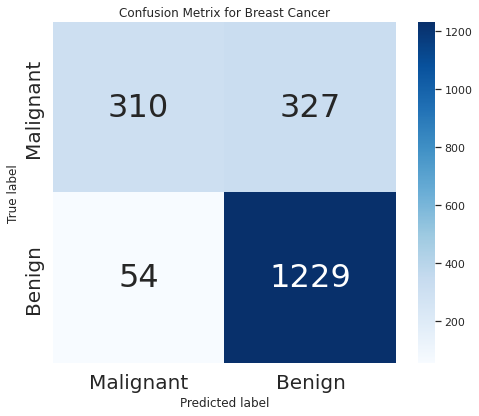

In [ ]:
from sklearn.metrics import confusion_matrix

sns.set(rc={'figure.figsize':(7.7,6.27)})

sns.heatmap(confusion_matrix(y_test,y_pred),cmap=plt.cm.Blues,annot=True,annot_kws={"size": 32}, fmt='g')
plt.xticks([0.50,1.50], ['Malignant','Benign'], fontsize=20)
plt.yticks([0.50,1.50],['Malignant','Benign'], fontsize=20)

plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.title('Confusion Metrix for Breast Cancer')

In [ ]:
print(classification_report(y_test, y_pred, target_names = ['Benign (Class 0)','Malignant (Class 1)']))

                     precision    recall  f1-score   support

   Benign (Class 0)       0.85      0.49      0.62       637
Malignant (Class 1)       0.79      0.96      0.87      1283

           accuracy                           0.80      1920
          macro avg       0.82      0.72      0.74      1920
       weighted avg       0.81      0.80      0.78      1920



In [ ]:
from sklearn.metrics import roc_curve, auc

fpr , tpr , thresholds = roc_curve (y_test , y_pred_prob)

area_under_curve = auc(fpr, tpr)

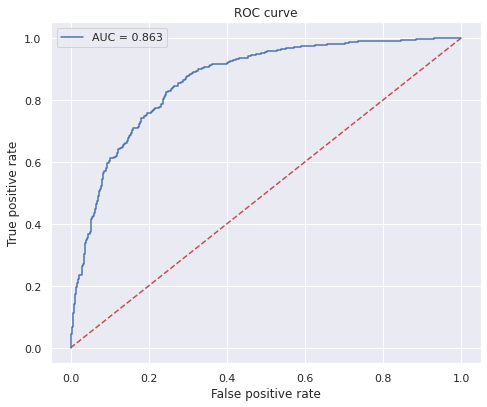

In [ ]:
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(fpr, tpr, label='AUC = {:.3f}'.format(area_under_curve))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
cancer_labels = ['Benign','Malignant']

img_indices = np.random.randint(0, len(X_test), size=[25])
sample_test_images = X_test[img_indices]
sample_test_labels = [cancer_labels[i] for i in y_pred[img_indices].squeeze()]

max_prediction = np.argmax(y_pred_prob, axis=1)
prediction_probs = np.max(y_pred_prob, axis=1)

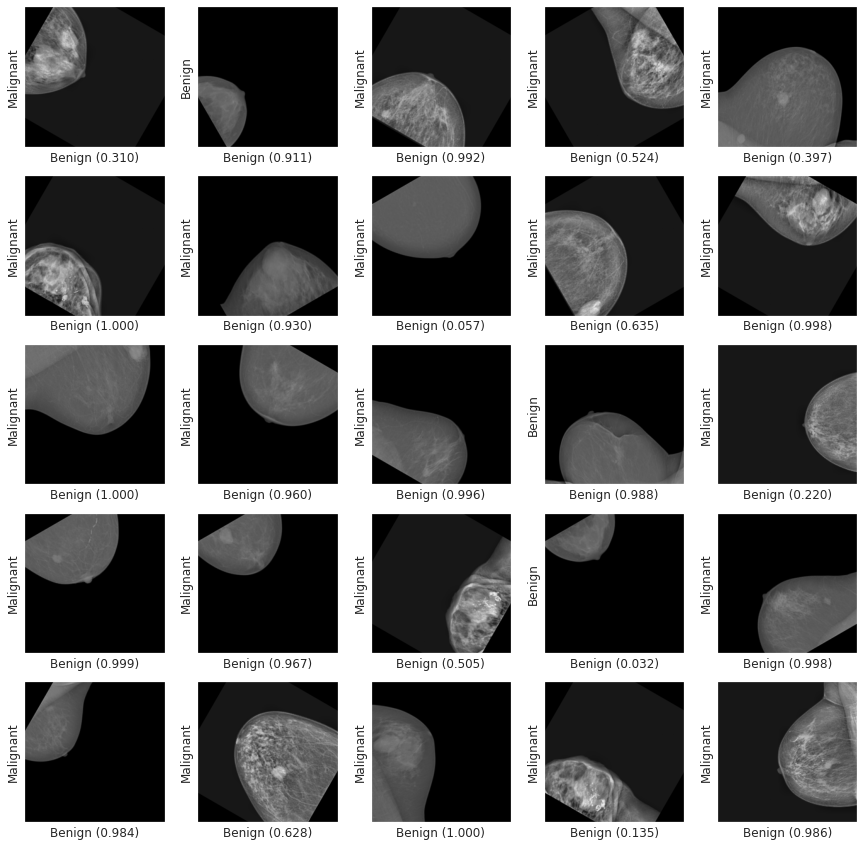

In [ ]:
plt.figure(figsize=(15,15))
for i, (img, prediction, prob, true_label) in enumerate(
    zip(sample_test_images, max_prediction, prediction_probs, sample_test_labels)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')

  plt.imshow(img)
  plt.xlabel('{} ({:0.3f})'.format(cancer_labels[prediction], prob))
  plt.ylabel('{}'.format(true_label))


# Transfer Learning using VGG16

## Feature Extraction (freezing the convolutional bases)

In [ ]:
from keras.applications.vgg16 import VGG16

backbone = VGG16(input_shape = (224, 224, 3), include_top=False, weights='imagenet')

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
backbone.trainable = False

In [ ]:
VGG_model = Sequential()
VGG_model.add(backbone)
VGG_model.add(Flatten())
VGG_model.add(Dense(512, activation='relu'))
VGG_model.add(BatchNormalization())
VGG_model.add(Dropout(0.5))
VGG_model.add(Dense(1, activation='sigmoid'))

In [ ]:
VGG_model.compile(
        loss='binary_crossentropy',
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.00005),
        metrics=['accuracy']
    )

In [ ]:
VGG_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_5 (Dense)             (None, 512)               12845568  
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 1)                 513       
                                                      

In [ ]:
# Checkpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [ ]:
history = VGG_model.fit_generator(generator = train, 
                    steps_per_epoch=STEP_SIZE_TRAIN, 
                    validation_data=test,
                    validation_steps=STEP_SIZE_VAL,
                    epochs=10)
VGG_model.save('/content/gdrive/My Drive/VGG_model.h5')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/10
59/59 [==============================] - 40s 665ms/step - loss: 0.8029 - accuracy: 0.5754 - val_loss: 0.6325 - val_accuracy: 0.6724
Epoch 2/10
59/59 [==============================] - 39s 663ms/step - loss: 0.6008 - accuracy: 0.6922 - val_loss: 0.5218 - val_accuracy: 0.7942
Epoch 3/10
59/59 [==============================] - 39s 663ms/step - loss: 0.5096 - accuracy: 0.7508 - val_loss: 0.5044 - val_accuracy: 0.7786
Epoch 4/10
59/59 [==============================] - 39s 663ms/step - loss: 0.4480 - accuracy: 0.7862 - val_loss: 0.5234 - val_accuracy: 0.7381
Epoch 5/10
59/59 [==============================] - 39s 663ms/step - loss: 0.3739 - accuracy: 0.8308 - val_loss: 0.5398 - val_accuracy: 0.7360
Epoch 6/10
59/59 [==============================] - 39s 663ms/step - loss: 0.3466 - accuracy: 0.8428 - val_loss: 0.3833 - val_accuracy: 0.8367
Epoch 7/10
59/59 [==============================] - 39s 663ms/step - loss: 0.3193 - accuracy: 0.8651 - val_loss: 0.4098 - val_accuracy: 0.8157

In [ ]:
VGG_model = load_model('/content/gdrive/My Drive/VGG_model.h5')

In [ ]:
score1 = VGG_model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score1[0]} / Test accuracy: {score1[1]}')

Test loss: 0.3554753363132477 / Test accuracy: 0.8473958373069763


In [ ]:
y_pred_prob_2 = VGG_model.predict(X_test)

In [ ]:
threshold = 0.5
y_pred_2 = np.where(y_pred_prob_2 > threshold, 1,0)
y_pred_2.squeeze()

array([0, 1, 1, ..., 0, 1, 1])

Text(0.5, 1.0, 'Confusion Metrix for Breast Cancer')

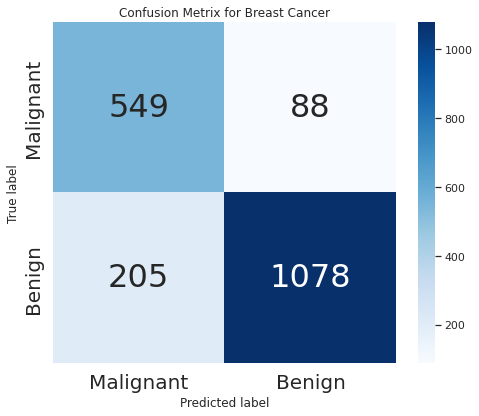

In [ ]:
sns.set(rc={'figure.figsize':(7.7,6.27)})

sns.heatmap(confusion_matrix(y_test,y_pred_2),cmap=plt.cm.Blues,annot=True,annot_kws={"size": 32}, fmt='g')
plt.xticks([0.50,1.50], ['Malignant','Benign'], fontsize=20)
plt.yticks([0.50,1.50],['Malignant','Benign'], fontsize=20)

plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.title('Confusion Metrix for Breast Cancer')

In [ ]:
print(classification_report(y_test, y_pred_2, target_names = ['Benign (Class 0)','Malignant (Class 1)']))

                     precision    recall  f1-score   support

   Benign (Class 0)       0.73      0.86      0.79       637
Malignant (Class 1)       0.92      0.84      0.88      1283

           accuracy                           0.85      1920
          macro avg       0.83      0.85      0.83      1920
       weighted avg       0.86      0.85      0.85      1920



## Fine Tuning

In [ ]:
backbone2 = VGG16(input_shape = (224, 224, 3), include_top=False, weights='imagenet')

In [ ]:
backbone.trainable = True

In [ ]:
# Unfreeze final 2 convolution blocks

set_trainable = False
for layer in backbone2.layers:
    if layer.name == 'block4_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
VGG_model_2 = Sequential()
VGG_model_2.add(backbone2)
VGG_model_2.add(GlobalAveragePooling2D())
VGG_model_2.add(BatchNormalization())
VGG_model_2.add(Dropout(0.5))
VGG_model_2.add(Dense(1, activation='sigmoid'))

In [ ]:
VGG_model_2.compile(
        loss='binary_crossentropy',
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.00005),
        metrics=['accuracy']
    )

In [ ]:
VGG_model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_1   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 batch_normalization_2 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 1)                 513       
                                                                 
Total params: 14,717,249
Trainable params: 12,980,737


In [ ]:
history = VGG_model_2.fit_generator(generator = train, 
                    steps_per_epoch=STEP_SIZE_TRAIN, 
                    validation_data=test,
                    validation_steps=STEP_SIZE_VAL,
                    epochs=10)
VGG_model_2.save('/content/gdrive/My Drive/VGG_model_2.h5')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/10
59/59 [==============================] - 58s 904ms/step - loss: 0.6842 - accuracy: 0.6026 - val_loss: 0.6042 - val_accuracy: 0.6692
Epoch 2/10
59/59 [==============================] - 52s 883ms/step - loss: 0.4882 - accuracy: 0.7641 - val_loss: 0.6270 - val_accuracy: 0.6686
Epoch 3/10
59/59 [==============================] - 52s 885ms/step - loss: 0.3569 - accuracy: 0.8382 - val_loss: 0.6553 - val_accuracy: 0.5490
Epoch 4/10
59/59 [==============================] - 52s 886ms/step - loss: 0.2372 - accuracy: 0.9057 - val_loss: 0.3901 - val_accuracy: 0.8879
Epoch 5/10
59/59 [==============================] - 52s 881ms/step - loss: 0.2070 - accuracy: 0.9168 - val_loss: 0.2887 - val_accuracy: 0.9073
Epoch 6/10
59/59 [==============================] - 52s 881ms/step - loss: 0.1273 - accuracy: 0.9491 - val_loss: 0.9139 - val_accuracy: 0.6562
Epoch 7/10
59/59 [==============================] - 52s 882ms/step - loss: 0.1012 - accuracy: 0.9624 - val_loss: 0.1966 - val_accuracy: 0.9133

In [ ]:
VGG_model_2 = load_model('/content/gdrive/My Drive/VGG_model_2.h5')

In [ ]:
score2 = VGG_model_2.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score2[0]} / Test accuracy: {score2[1]}')

Test loss: 0.5398589968681335 / Test accuracy: 0.8374999761581421


In [ ]:
y_pred_prob_3 = VGG_model_2.predict(X_test)

In [ ]:
threshold = 0.5
y_pred_3 = np.where(y_pred_prob_3 > threshold, 1,0)
y_pred_3.squeeze()

array([0, 0, 1, ..., 0, 1, 1])

Text(0.5, 1.0, 'Confusion Metrix for Breast Cancer')

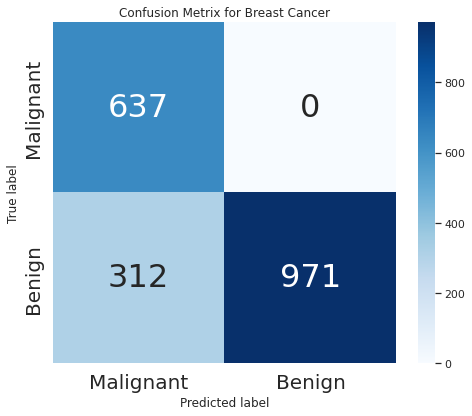

In [ ]:
sns.set(rc={'figure.figsize':(7.7,6.27)})

sns.heatmap(confusion_matrix(y_test,y_pred_3),cmap=plt.cm.Blues,annot=True,annot_kws={"size": 32}, fmt='g')
plt.xticks([0.50,1.50], ['Malignant','Benign'], fontsize=20)
plt.yticks([0.50,1.50],['Malignant','Benign'], fontsize=20)

plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.title('Confusion Metrix for Breast Cancer')

In [ ]:
print(classification_report(y_test, y_pred_3, target_names = ['Benign (Class 0)','Malignant (Class 1)']))

                     precision    recall  f1-score   support

   Benign (Class 0)       0.67      1.00      0.80       637
Malignant (Class 1)       1.00      0.76      0.86      1283

           accuracy                           0.84      1920
          macro avg       0.84      0.88      0.83      1920
       weighted avg       0.89      0.84      0.84      1920



# Transfer Learning using ResNet50

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
backbone3 = ResNet50(input_shape = (224, 224, 3), include_top=False, weights='imagenet')

94781440/94765736 [==============================] - 0s 0us/step


In [ ]:
backbone3.training = False

In [ ]:
ResNet50_model = Sequential()
ResNet50_model.add(backbone3)
ResNet50_model.add(GlobalAveragePooling2D())
ResNet50_model.add(Dropout(0.5))
ResNet50_model.add(Dense(1, activation='sigmoid'))

In [ ]:
ResNet50_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 1)                 2049      
                                                                 
Total params: 23,589,761
Trainable params: 23,536,641
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
ResNet50_model.compile(
        loss='binary_crossentropy',
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.00005),
        metrics=['accuracy']
    )

In [ ]:
history = ResNet50_model.fit_generator(generator = train, 
                    steps_per_epoch=STEP_SIZE_TRAIN, 
                    validation_data=test,
                    validation_steps=STEP_SIZE_VAL,
                    epochs=10)
ResNet50_model.save('/content/gdrive/My Drive/ResNet50_model.h5')

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


59/59 [==============================] - 49s 728ms/step - loss: 0.1514 - accuracy: 0.9414 - val_loss: 0.7729 - val_accuracy: 0.6352
Epoch 2/10
59/59 [==============================] - 43s 733ms/step - loss: 0.0323 - accuracy: 0.9891 - val_loss: 0.7933 - val_accuracy: 0.6703
Epoch 3/10
59/59 [==============================] - 43s 724ms/step - loss: 0.0285 - accuracy: 0.9901 - val_loss: 0.7575 - val_accuracy: 0.7117
Epoch 4/10
59/59 [==============================] - 44s 740ms/step - loss: 0.0173 - accuracy: 0.9955 - val_loss: 0.8219 - val_accuracy: 0.7058
Epoch 5/10
59/59 [==============================] - 43s 729ms/step - loss: 0.0105 - accuracy: 0.9971 - val_loss: 0.7284 - val_accuracy: 0.7441
Epoch 6/10
59/59 [==============================] - 43s 726ms/step - loss: 0.0038 - accuracy: 0.9989 - val_loss: 0.6851 - val_accuracy: 0.7548
Epoch 7/10
59/59 [==============================] - 43s 726ms/step - loss: 0.0032 - accuracy: 0.9995 - val_loss: 0.6800 - val_accuracy: 0.7651
Epoch 8/10

In [ ]:
ResNet50_model = load_model('/content/gdrive/My Drive/ResNet50_model.h5')

NameError: ignored

In [ ]:
score3 = ResNet50_model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score3[0]} / Test accuracy: {score3[1]}')

Test loss: 0.31827858090400696 / Test accuracy: 0.8645833134651184


In [ ]:
y_pred_prob_4 = ResNet50_model.predict(X_test)

In [ ]:
threshold = 0.5
y_pred_4 = np.where(y_pred_prob_4 > threshold, 1,0)
y_pred_4.squeeze()

array([1, 1, 1, ..., 0, 1, 1])

Text(0.5, 1.0, 'Confusion Metrix for Breast Cancer')

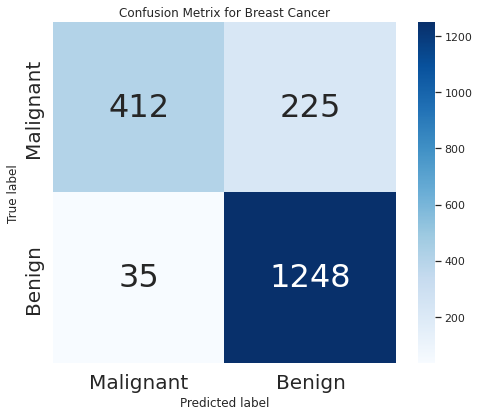

In [ ]:
sns.set(rc={'figure.figsize':(7.7,6.27)})

sns.heatmap(confusion_matrix(y_test,y_pred_4),cmap=plt.cm.Blues,annot=True,annot_kws={"size": 32}, fmt='g')
plt.xticks([0.50,1.50], ['Malignant','Benign'], fontsize=20)
plt.yticks([0.50,1.50],['Malignant','Benign'], fontsize=20)

plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.title('Confusion Metrix for Breast Cancer')

In [ ]:
print(classification_report(y_test, y_pred_4, target_names = ['Benign (Class 0)','Malignant (Class 1)']))